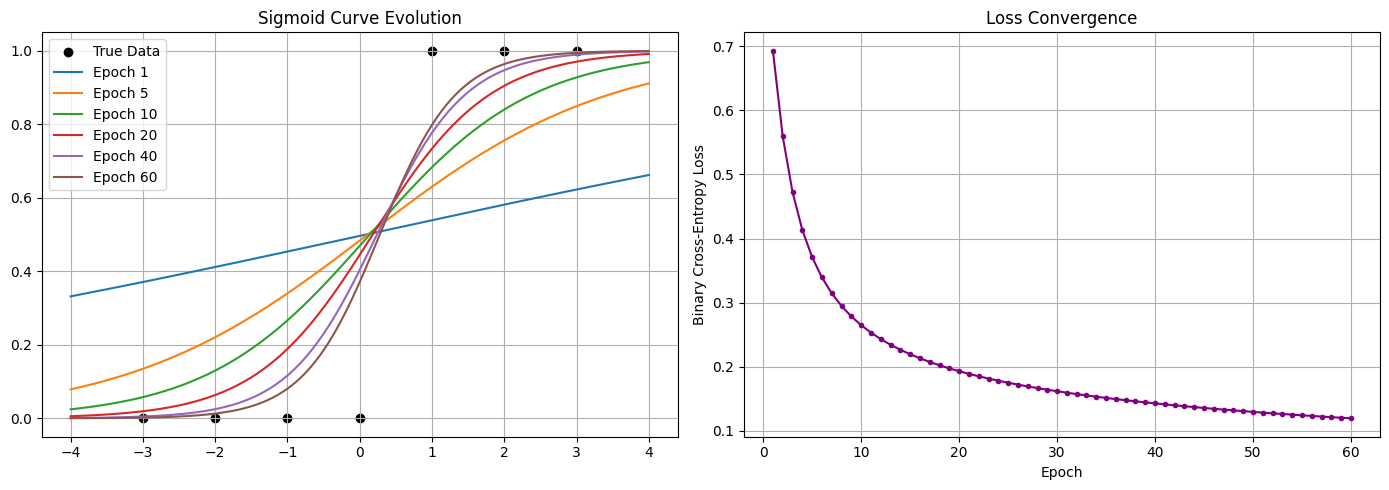

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def compute_loss(y_true, y_pred):
    eps = 1e-10
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

# New larger dataset
X = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([0, 0, 0, 0, 1, 1, 1])

# Initialize parameters
w, b = 0.0, 0.0
lr = 0.2
losses = []
snapshots = {}  # epoch: (w, b)

# Training
epochs = 60
snapshot_epochs = [1, 5, 10, 20, 40, 60]

for epoch in range(1, epochs + 1):
    z = w * X + b
    y_pred = sigmoid(z)
    loss = compute_loss(y, y_pred)
    losses.append(loss)

    # Gradients
    dw = np.mean((y_pred - y) * X)
    db = np.mean(y_pred - y)

    # Update
    w -= lr * dw
    b -= lr * db

    if epoch in snapshot_epochs:
        snapshots[epoch] = (w, b)

# Plotting
x_plot = np.linspace(-4, 4, 200)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Sigmoid curve evolution
axs[0].scatter(X, y, color="black", label="True Data")
for epoch, (w_s, b_s) in snapshots.items():
    y_curve = sigmoid(w_s * x_plot + b_s)
    axs[0].plot(x_plot, y_curve, label=f"Epoch {epoch}")
axs[0].set_title("Sigmoid Curve Evolution")
axs[0].legend()
axs[0].grid(True)

# Loss curve
axs[1].plot(range(1, epochs + 1), losses, color="purple", marker="o", markersize=3)
axs[1].set_title("Loss Convergence")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Binary Cross-Entropy Loss")
axs[1].grid(True)

plt.tight_layout()
plt.show()
